In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27604\1251683027.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


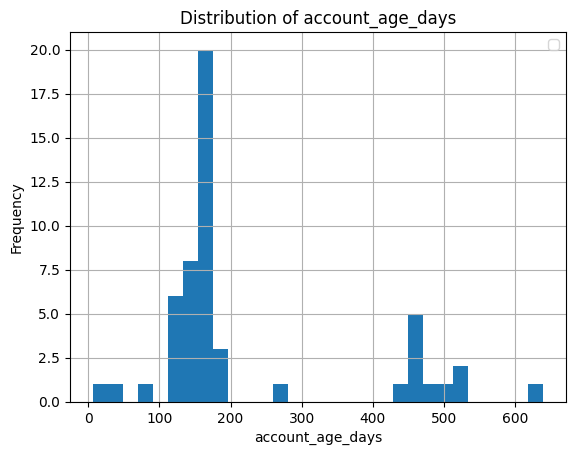

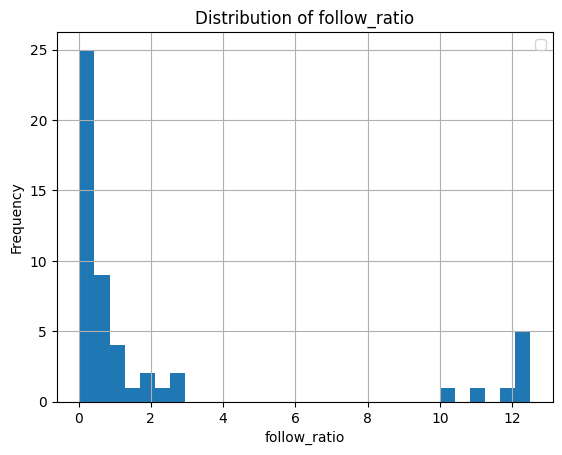

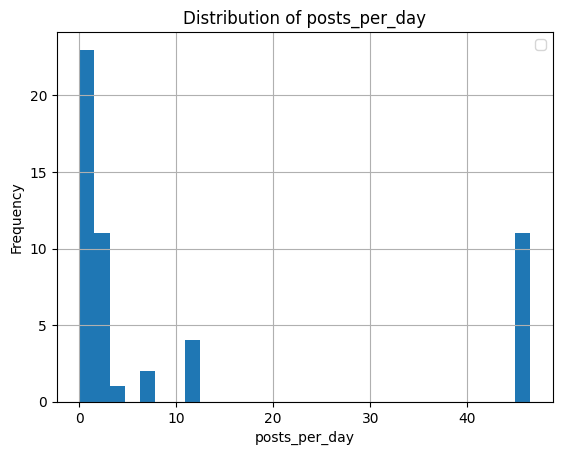

In [23]:
df = pd.read_json('./../bot_results.jsonl', lines=True)

# Plot histograms with threshold lines
for col in [('account_age_days'), ('follow_ratio'), ('posts_per_day')]:
    plt.figure()
    df[col].dropna().hist(bins=30)
    # plt.axvline(thr, linestyle='--', label=f'Threshold: {thr:.2f}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [19]:
df.head()

,is_bot,account_age_days,follow_ratio,posts_per_day,followers,follows,url
0,True,167,0.130435,46.488095,91,12,https://bsky.app/profile/did:plc:x7zxmjbmttzq6...
1,False,157,0.026096,2.721519,2988,78,https://bsky.app/profile/did:plc:jjxjwrox32mxo...
2,True,167,0.130435,46.488095,91,12,https://bsky.app/profile/did:plc:x7zxmjbmttzq6...
3,False,450,12.500000,0.077605,31,400,https://bsky.app/profile/did:plc:utytkrjsz6ulb...
4,False,640,0.223938,0.659906,258,58,https://bsky.app/profile/did:plc:q2etukujnutpb...


1


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27604\300526203.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


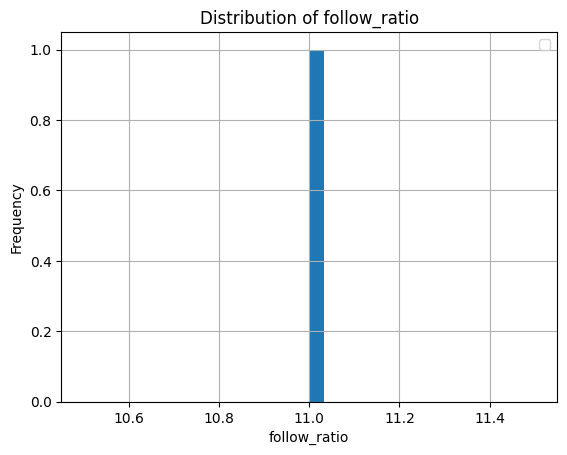

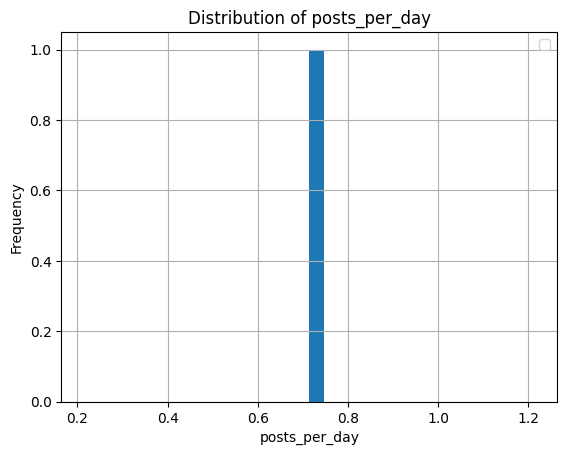

In [24]:
young_accounts = df[df['account_age_days'] < 30]
print(len(young_accounts))

# Plot followers and follows
for col in [('follow_ratio'), ('posts_per_day')]:
    plt.figure()
    young_accounts[col].dropna().hist(bins=30)
    # plt.axvline(thr, linestyle='--', label=f'Threshold: {thr:.2f}')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [25]:
young_accounts.head()

,is_bot,account_age_days,follow_ratio,posts_per_day,followers,follows,url
43,False,6,11.0,0.714286,0,11,https://bsky.app/profile/did:plc:iuoxbdp7polc7...
